In [1]:
import pymc3 as pm
import numpy as np
import scipy.io as sio

import matplotlib.pyplot as plt
%matplotlib inline

import imageio

In [2]:
mycmap = 'seismic'

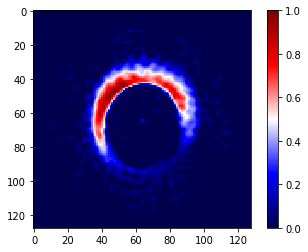

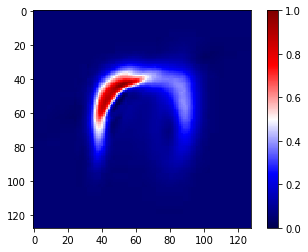

In [3]:
I = imageio.imread('name_HD142527.jpg')
Imod = imageio.imread('name_HD142527_reconstruction_1500basis.jpg')

plt.figure()
im = plt.imshow(I/np.max(I), cmap=mycmap)
plt.colorbar(im)
plt.figure()
im = plt.imshow(Imod/np.max(Imod), cmap=mycmap)
plt.colorbar(im)

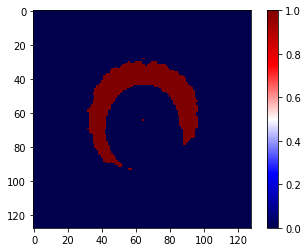

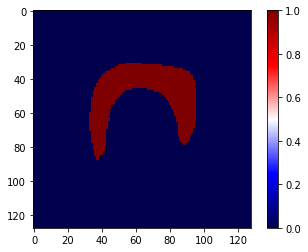

In [4]:
plt.figure()
im = plt.imshow(I/np.max(I) > 0.2, cmap=mycmap)
plt.colorbar(im)
plt.figure()
im = plt.imshow(Imod/np.max(Imod) > 0.2, cmap=mycmap)
plt.colorbar(im)

# Wasserstein Distance

In [5]:
def cumulative(A):
    cumMatrix = np.zeros(A.shape)
    cumMatrix[0,:] = np.cumsum(A[0,:])
    cumMatrix[:,0] = np.cumsum(A[:,0])
    
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if i == 0 or j == 0:
                continue
            cumMatrix[i,j] = np.sum(A[:i,:j])

    return cumMatrix

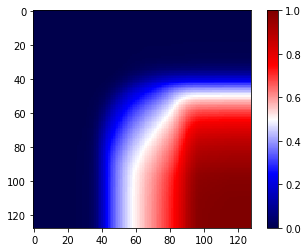

In [6]:
# wassersteing_distance(I,Imod)
I_cum = cumulative(I)
I_cum = I_cum/I_cum[-1,-1]
im = plt.imshow(I_cum, cmap=mycmap)
plt.colorbar(im)

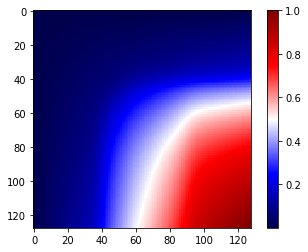

In [7]:
I_cum = cumulative(Imod)
I_cum = I_cum/I_cum[-1,-1]
im = plt.imshow(I_cum, cmap=mycmap)
plt.colorbar(im)

In [8]:
def inverseF(I,z, Icum = None):
    assert z>=0 and z<=1, 'z must to exist in [0,1]'
    
    if Icum is None:
        Icum = cumulative(I)
        Icum = Icum/Icum[-1,-1]
        
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if Icum[i,j] >= z:
                return i,j
    return -1,-1

In [9]:
def wasserstein_distance(I0,I1, p = 2, m = 100):
    zArray = np.linspace(0,1,m)
    dz = zArray[1]-zArray[0]
    distance = 0
    
    I0cum = cumulative(I0)
    I0cum = I0cum/I0cum[-1,-1]
    I1cum = cumulative(I1)
    I1cum = I1cum/I1cum[-1,-1]

    for z in zArray:
        i0,j0 = inverseF(I0,z, Icum = I0cum)
        i1,j1 = inverseF(I1,z, Icum = I1cum)
        distance = distance + (np.abs(i0-i1)**p+np.abs(j0-j1)**p)*dz

    return distance**(1./p)

In [10]:
ImodDistance_Wasserstein = wasserstein_distance(I,Imod, p = 2, m = 100)
print('Wasserstein Distance I and Imod  : {}'.format(ImodDistance_Wasserstein))


Dirac = np.zeros(I.shape)
Dirac[int(I.shape[0]/2),int(I.shape[1]/2)] = 1
# plt.figure()
# plt.imshow(Dirac)
# plt.figure()
# im = plt.imshow(cumulative(Dirac))
# plt.colorbar(im)
DiractDistance_Wasserstein = wasserstein_distance(I,Dirac, p = 2, m = 100)
print('Wasserstein Distance I and Dirac : {}'.format(DiractDistance_Wasserstein))

NormalizedDistance_Wasserstein = ImodDistance_Wasserstein/DiractDistance_Wasserstein
print('')
print('Normalized Wasserstein Distance I and Imod : {}'.format(NormalizedDistance_Wasserstein))

Wasserstein Distance I and Imod  : 33.24123640871076
Wasserstein Distance I and Dirac : 38.355066303046726

Normalized Wasserstein Distance I and Imod : 0.8666713321799225


# Hausdorff

In [11]:
from hausdorff import hausdorff, weighted_hausdorff

In [12]:
# print("Hausdorff distance test: {0}".format())
# print("Weighted Hausdorff distance test: {0}".format(weighted_hausdorff(X, Y, w)))

ImodDistance_Hausdorff = hausdorff(I.astype(float)/np.max(I) ,Imod.astype(float)/np.max(Imod))
DiractDistance_Hausdorff = hausdorff(I.astype(float)/np.max(I), Dirac)

print('Wasserstein Distance I and Imod  : {}'.format(ImodDistance_Hausdorff))
print('Wasserstein Distance I and Dirac : {}'.format(DiractDistance_Hausdorff))

NormalizedDistance_Hausdorff = ImodDistance_Hausdorff/DiractDistance_Hausdorff
print('')
print('Normalized Wasserstein Distance I and Imod : {}'.format(NormalizedDistance_Hausdorff))

Wasserstein Distance I and Imod  : 1.6741975187520333
Wasserstein Distance I and Dirac : 4.571021841630471

Normalized Wasserstein Distance I and Imod : 0.3662632944573399


# SSIM

In [18]:
from skimage.measure import compare_ssim as ssim
# from skimage.measure import structural_similarity as ssim

In [31]:
ImodDistance_SSIM = (1 - ssim(I/np.max(I),Imod/np.max(Imod)))/2
DiractDistance_SSIM = (1 - ssim(I.astype(float)/np.max(I),Dirac.astype(float)/np.max(Dirac)))/2

print('Wasserstein Distance I and Imod  : {}'.format(ImodDistance_SSIM))
print('Wasserstein Distance I and Dirac : {}'.format(DiractDistance_SSIM))

NormalizedDistance_SSIM = ImodDistance_SSIM/DiractDistance_SSIM
print('')
print('Normalized Wasserstein Distance I and Imod : {}'.format(NormalizedDistance_SSIM))

Wasserstein Distance I and Imod  : 0.3511379211501183
Wasserstein Distance I and Dirac : 0.14754829439185974

Normalized Wasserstein Distance I and Imod : 2.3798168768902466
